**Chapter_3**  
**ATMOS 5040: Environmental Statistics**  
**John Horel **

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

    git clone https://github.com/johnhorel/ATMOS_5040_2019.git
    
> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`



`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3

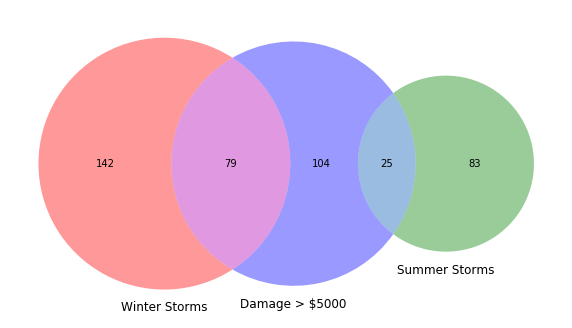

In [2]:
plt.figure(figsize=(10,10))
#python venn: A,B,A and B,C,A and C,B and C,A and B and C
v = venn3(subsets=(142, 83, 0, 104, 79, 25, 0), set_labels = ('Winter Storms', 'Summer Storms', 'Damage > $5000'))
plt.savefig('figure_3.1_2019_python.png')

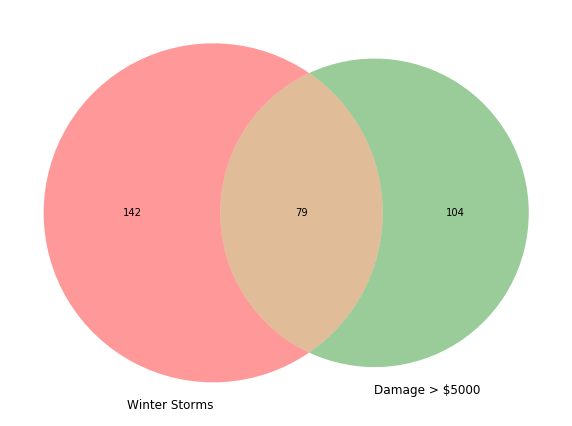

In [3]:
plt.figure(figsize=(10,10))
#python venn: A,B,A and B
# for demonstrating union of two types of occurrences
v = venn2(subsets=(142, 104, 79), set_labels = ('Winter Storms', 'Damage > $5000'))
plt.savefig('figure_3.3_2019_python.png')

NameError: name 'norm' is not defined

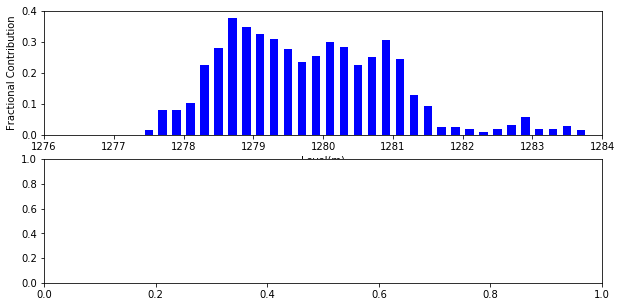

In [4]:
#figure 3.3
# plot empirical and gaussian fits to pdf and cdf of lake level

#read and then convert lake level to meters
levmon = .3048 * np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=2)

fig2,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

#get total number of values
N = len(levmon)
#set range
x = np.arange(1276,1284,0.2)
#doing as fractional contributions 
#which means probability is width (0.2)* fractional contribution
hist_val,bins = np.histogram(levmon,x,density=True)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax1.bar(center,hist_val,align='center',width=width,color='blue')
ax1.set(xlim=(1276,1284),ylim=(0,0.4))
ax1.set(xlabel="Level(m)",ylabel='Fractional Contribution')

#empirical values
#mean
levm = np.mean(levmon)
# unbiased estimate of pop standard deviation 
stdl = np.std(levmon,ddof=1,axis=0)

# gaussian fit to monthly lake level
(mu_g, sigma_g) = norm.fit(levmon)

print("empirical: mean and standard deviation %.1f %.2f (m)" % (levm,stdl))
print("gaussian fit: mean and standard deviation %.1f %.2f (m)" % (mu_g,sigma_g))

# add a gaussian fit line for pdf
y1 = stats.norm.pdf( bins, mu_g, sigma_g)
ax1.plot(bins, y1, 'r', linewidth=1)

# plot the cumulative histogram
n2, bins2, patches = ax2.hist(levmon, N, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax2.set(xlim=(1276,max(levmon)),ylim=(0,1.0))
ax2.set(xlabel="Level(m)",ylabel='Cumulative Distribution')

# add a gaussian fit line for cdf
y2 = stats.norm.cdf(x, mu_g, sigma_g)
ax2.plot(bins, y2, 'r', linewidth=1)
plt.savefig('figure_3.3_2019_python.png')




tint = 0.5;
xt = -23:tint:18;
ht=histnorm(cln,xt);
% since original data to nearest whole def F, histogram has some holes (no
% possible values)
% fit gaussian to histogram of collins temp
tm = mean(cln);
stdt = std(cln,0);
[sigmat,mut] = gaussfit(xt,ht);
% compute gaussian parametric distribution
pdfg_cln = exp(-(xt-mut).^2/(2*sigmat^2))/(sigmat * sqrt(2*pi));
figure(4)
subplot(2,1,1)
bar(xt,ht)
axis([xt(1) xt(length(xt)) 0 0.1])
hold on
plot(xt,pdfg_cln,'r')
xlabel('Temperature (C)');
ylabel('Fractional Contribution');
title('Temperature Histogram & Gaussian Fit: John Horel 12/29/18');

% plot cumulative distribution
subplot(2,1,2)
[ct yt] =cdfnorm(cln,xt);
plot(yt,ct)
hold on
axis([yt(1) yt(length(yt)) 0 1])
xlabel('Temperature (C)');
ylabel('Cumulative Distribution');
title('Temperature Cumulative Distribution & Gaussian Fit: John Horel 12/29/18');
nt = length(xt);
cdfg_cln(1)=0;
for i = 2:nt
    cdfg_cln(i) = cdfg_cln(i-1) + pdfg_cln(i)*tint;
end
cdfg_cln(i+1)= cdfg_cln(i);
plot(yt,cdfg_cln,'r')


In [29]:
#read the collins air temperature data
cln = np.genfromtxt('../data/alta_stns.dat',usecols=6)
print(cln)

[-6.1 -6.7 -2.2 ...  0.   0.   0. ]


In [ ]:
#empirical values
#mean
levm = np.mean(levmon)
# unbiased estimate of pop standard deviation 
stdl = np.std(levmon,ddof=1,axis=0)

# gaussian fit to monthly lake level
(mu_g, sigma_g) = norm.fit(levmon)
